## Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from acquire import get_iris_data
from wrangle_iris import wrangle_iris_data
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

np.random.seed(4)

### Clustering with the Iris Dataset

#### Using this lesson as a guide, perform clustering on the iris dataset.

In [2]:
df= get_iris_data()

In [3]:
train, validate, test, train_scaled, validate_scaled, test_scaled = wrangle_iris_data()

In [4]:
train.columns, train_scaled.columns

(Index(['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
        'species_versicolor', 'species_virginica'],
       dtype='object'),
 Index(['species_versicolor', 'species_virginica', 'sepal_length_scaled',
        'sepal_width_scaled', 'petal_length_scaled', 'petal_width_scaled'],
       dtype='object'))

#### Choose features other than the ones used in the lesson.

In [5]:
# select the columns to cluster on 
X = train_scaled[['petal_width_scaled', 'sepal_width_scaled']]
# create the object
kmeans = KMeans(n_clusters=3)
# fit the object
kmeans.fit(X)

KMeans(n_clusters=3)

In [6]:
# evaluate the object
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,petal_width_scaled,sepal_width_scaled
0,0.489943,0.227273
1,0.802083,0.383117
2,0.072531,0.595960


In [7]:
# use the labels from the object to create cluster feature
train['cluster'] = kmeans.labels_

In [8]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica,cluster
79,versicolor,5.7,2.6,3.5,1.0,1,0,0
36,setosa,5.5,3.5,1.3,0.2,0,0,2
133,virginica,6.3,2.8,5.1,1.5,0,1,0
95,versicolor,5.7,3.0,4.2,1.2,1,0,0
18,setosa,5.7,3.8,1.7,0.3,0,0,2


#### Visualize the results of your clustering.

In [9]:
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
cluster,,,,,,
0,5.872414,2.700000,4.241379,1.275862,0.862069,0.103448
1,6.600000,3.042857,5.460714,2.025000,0.107143,0.892857
2,5.111111,3.511111,1.514815,0.274074,0.000000,0.000000


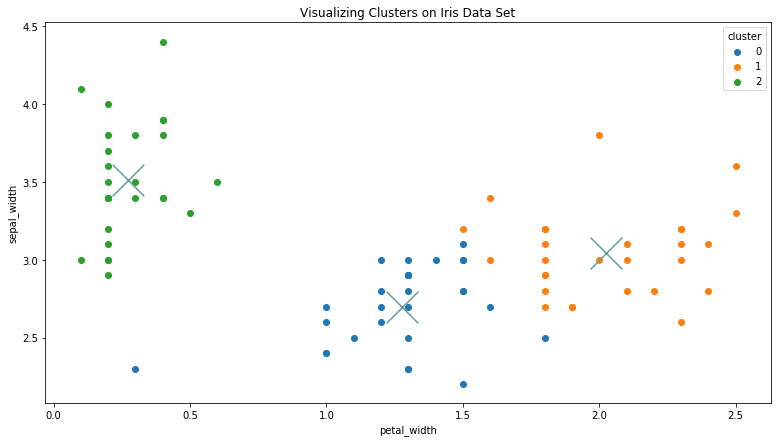

In [10]:
# visualize with chart
fig, ax = plt.subplots(figsize=(13, 7))


for cluster, subset in train.groupby('cluster'):
     ax.scatter(subset.petal_width, subset.sepal_width, label=cluster, cmap=cm.jet_r)
ax.set(xlabel='Petal Width', ylabel='Sepal Width', title="Visualizing Clusters on Iris Data Set")
ax.legend(title='cluster')


train.groupby('cluster').mean().plot.scatter(y='sepal_width', x='petal_width', marker='x', s=1000, ax=ax, color='cadetblue')

#### Use the elbow method to visually select a good value for k.

In [11]:
# sum of squared distances from each point to its cluster center
kmeans.inertia_

2.3413199854076825

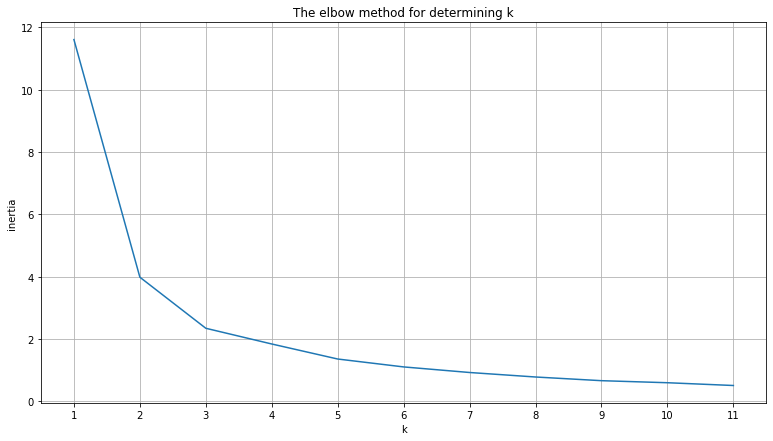

In [12]:
# create elbow method visualization
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

#### Repeat the clustering, this time with 3 different features.

In [13]:
X = train_scaled[['petal_length_scaled', 'sepal_width_scaled', 'petal_width_scaled']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [14]:
train['cluster'] = kmeans.labels_
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica,cluster
79,versicolor,5.7,2.6,3.5,1.0,1,0,2
36,setosa,5.5,3.5,1.3,0.2,0,0,1
133,virginica,6.3,2.8,5.1,1.5,0,1,2
95,versicolor,5.7,3.0,4.2,1.2,1,0,2
18,setosa,5.7,3.8,1.7,0.3,0,0,1


In [15]:
# Groups all features by the clusters that were identified, then determines the average for each feature per cluster

train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
cluster,,,,,,
0,6.610714,3.017857,5.507143,2.035714,0.071429,0.928571
1,5.089286,3.467857,1.507143,0.275000,0.000000,0.000000
2,5.910714,2.739286,4.300000,1.300000,0.928571,0.071429


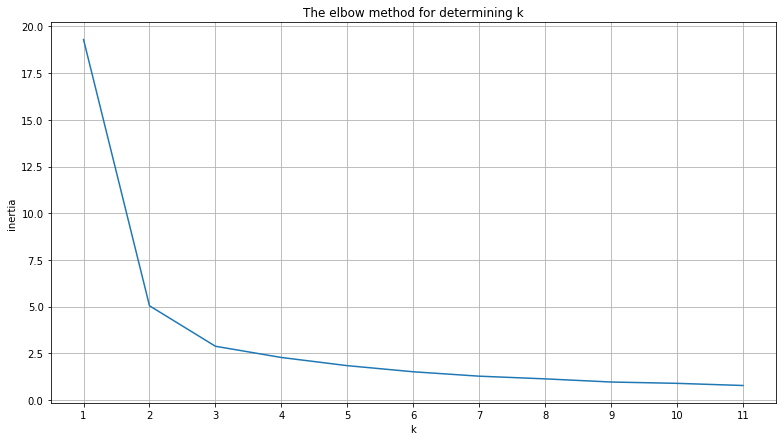

In [16]:
# Determining K using Elbow Method

output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

#### Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results! 

In [17]:
from wrangle_mall import scale_df, split_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      200 non-null    int64 
 1   customer_id     200 non-null    int64 
 2   gender          200 non-null    object
 3   age             200 non-null    int64 
 4   annual_income   200 non-null    int64 
 5   spending_score  200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [18]:

train, validate, test= split_df()

In [19]:
X_train_scaled, X_validate_scaled, X_test_scaled = scale_df()

TypeError: scale_df() missing 3 required positional arguments: 'train', 'validate', and 'test'

#### How does scaling impact the results of clustering?

#### Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.